# Organize
1. Create grid of 12h
2. Add mean and last known

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ltm = pd.read_parquet("../Dataset/mimic-iv/from_pipeline/ltm_5000.parquet")

In [4]:
ltm.stay_id.isna().sum()

0

In [5]:
ltm

,stay_id,time,value,variable,age,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
5177,mimic4-34155256,3 days 09:07:00,93.0,O2_pulseoxymetry_saturation,-0.379310,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5178,mimic4-34155256,4 days 03:07:00,93.0,O2_pulseoxymetry_saturation,-0.379310,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5179,mimic4-34155256,4 days 07:13:00,1.0,glasgow_coma_score_motor,-0.379310,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5180,mimic4-34155256,4 days 09:07:00,100.0,O2_pulseoxymetry_saturation,-0.379310,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5181,mimic4-34155256,10 days 04:07:00,94.0,O2_pulseoxymetry_saturation,-0.379310,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78385947,mimic4-31104880,8 days 04:19:00,55.0,noninvasive_diastolic_blood_pressure,-0.034483,0.0,-0.358982,-0.695859,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1
78385948,mimic4-31104880,0 days 11:17:00,54.0,noninvasive_diastolic_blood_pressure,-0.034483,0.0,-0.358982,-0.695859,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1
78385960,mimic4-31104880,6 days 05:19:00,91.0,noninvasive_systolic_blood_pressure,-0.034483,0.0,-0.358982,-0.695859,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1
78385961,mimic4-31104880,11 days 02:20:00,78.0,noninvasive_systolic_blood_pressure,-0.034483,0.0,-0.358982,-0.695859,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1


In [6]:
ltm.loc[ltm.stay_id=="mimic4-34155256"].sort_values("time").head(5)

,stay_id,time,value,variable,age,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
2275631,mimic4-34155256,0 days 00:07:00,36.388889,temperature,-0.37931,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
69861461,mimic4-34155256,0 days 00:18:00,61.000000,noninvasive_mean_blood_pressure,-0.37931,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
50361571,mimic4-34155256,0 days 00:18:00,47.000000,noninvasive_diastolic_blood_pressure,-0.37931,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
2276401,mimic4-34155256,0 days 00:18:00,109.000000,heart_rate,-0.37931,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
69861957,mimic4-34155256,0 days 00:18:00,108.000000,noninvasive_systolic_blood_pressure,-0.37931,0.0,-0.832172,-0.359809,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1


In [7]:
# Columns that do NOT change over time (baseline variables)
baseline_cols = [
    "stay_id", "age", "sex", "height", "weight",
    "unit_type", "origin", "los", "intime", "outtime", "death_time_from_intime", "icu_mortality"
]

# Pivot: variables → columns, values → entries
ltm_wide = (
    ltm
    .pivot_table(
        index=["stay_id", "time"],   # one row per (stay_id, time)
        columns="variable",          # each variable becomes a new column
        values="value",              # values fill the new columns
        aggfunc="first"              # safe if no duplicates
    )
    .reset_index()
)

# Merge baseline columns back (they are constant per stay_id)
ltm_wide = ltm_wide.merge(
    ltm[baseline_cols].drop_duplicates("stay_id"),
    on="stay_id",
    how="left"
)


In [8]:
ltm_wide

,stay_id,time,FiO2,O2_arterial_saturation,O2_pulseoxymetry_saturation,PEEP,PTT,alanine_aminotransferase,albumin,alkaline_phosphatase,...,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 00:53:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,0 days 02:47:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,0 days 03:06:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
3,mimic4-30002548,0 days 03:46:17,100.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
4,mimic4-30002548,0 days 03:49:17,NaN,NaN,NaN,NaN,27.9,NaN,NaN,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792245,mimic4-39997955,4 days 13:56:58,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
792246,mimic4-39997955,4 days 14:56:58,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
792247,mimic4-39997955,4 days 15:56:58,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
792248,mimic4-39997955,4 days 16:56:58,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0


In [9]:
ltm_wide.stay_id.isna().sum()

0

In [10]:
ltm_wide.loc[ltm_wide.stay_id=="mimic4-30002548"].sort_values("time").head(5)

,stay_id,time,FiO2,O2_arterial_saturation,O2_pulseoxymetry_saturation,PEEP,PTT,alanine_aminotransferase,albumin,alkaline_phosphatase,...,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 00:53:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,0 days 02:47:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,0 days 03:06:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
3,mimic4-30002548,0 days 03:46:17,100.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
4,mimic4-30002548,0 days 03:49:17,NaN,NaN,NaN,NaN,27.9,NaN,NaN,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0


In [11]:
ltm_wide.columns

Index(['stay_id', 'time', 'FiO2', 'O2_arterial_saturation',
       'O2_pulseoxymetry_saturation', 'PEEP', 'PTT',
       'alanine_aminotransferase', 'albumin', 'alkaline_phosphatase',
       'aspartate_aminotransferase', 'bicarbonate', 'bilirubine',
       'blood_glucose', 'blood_urea_nitrogen', 'calcium', 'chloride',
       'creatinine', 'expiratory_tidal_volume', 'glasgow_coma_score_eye',
       'glasgow_coma_score_motor', 'glasgow_coma_score_verbal', 'heart_rate',
       'hemoglobin', 'invasive_diastolic_blood_pressure',
       'invasive_mean_blood_pressure', 'invasive_systolic_blood_pressure',
       'lactate', 'magnesium', 'noninvasive_diastolic_blood_pressure',
       'noninvasive_mean_blood_pressure',
       'noninvasive_systolic_blood_pressure', 'pH', 'paCO2', 'paO2',
       'phosphate', 'plateau_pressure', 'platelets', 'potassium',
       'respiratory_rate', 'respiratory_rate_setting', 'sodium', 'temperature',
       'tidal_volume_setting', 'urine_output', 'ventilator_mode',
  

In [57]:
ltm_wide.hemoglobin.describe()

count     31461.000000
mean        200.448364
std       13807.476562
min           0.000000
25%           8.200000
50%           9.400000
75%          11.000000
max      999999.000000
Name: hemoglobin, dtype: float64

# Replace sentinel values with NaN

# Combine GCS
# Choose ABP
# O2 saturation

In [12]:
# Combine GCS
ltm_wide["glasgow_coma_score"] = (
    ltm_wide["glasgow_coma_score_eye"]
    + ltm_wide["glasgow_coma_score_motor"]
    + ltm_wide["glasgow_coma_score_verbal"]
)

# Replace invalid sums with NaN if any component is missing
ltm_wide["glasgow_coma_score"] = (
    ltm_wide["glasgow_coma_score"]
    .where(
        ltm_wide[[
            "glasgow_coma_score_eye",
            "glasgow_coma_score_motor",
            "glasgow_coma_score_verbal"
        ]].notna().all(axis=1)
    )
)

#ltm_wide['glasgow_coma_score'] = ltm_wide['glasgow_coma_score'].fillna(15)

In [13]:
# Combine ABP
df = ltm_wide.copy()
# ---------------------------
# 1. Compute invasive MAP if SBP/DBP are present
# ---------------------------
df["MAP_art_calc"] = (
    df["invasive_systolic_blood_pressure"] +
    2 * df["invasive_diastolic_blood_pressure"]
) / 3

# Pick invasive_mean if exists, else computed invasive
df["MAP_invasive"] = df["invasive_mean_blood_pressure"].combine_first(df["MAP_art_calc"])


# ---------------------------
# 2. Compute non-invasive MAP if SBP/DBP are present
# ---------------------------
df["MAP_nibp_calc"] = (
    df["noninvasive_systolic_blood_pressure"] +
    2 * df["noninvasive_diastolic_blood_pressure"]
) / 3

# Pick noninvasive_mean if exists, else computed non-invasive
df["MAP_noninvasive"] = df["noninvasive_mean_blood_pressure"].combine_first(df["MAP_nibp_calc"])


# ---------------------------
# 3. Final clinically informed hierarchy
# ---------------------------
# Use invasive MAP when available, else non-invasive MAP
df["arterial_blood_pressure"] = df["MAP_invasive"].combine_first(df["MAP_noninvasive"])


# Optional: cleanup intermediate columns if you want
df.drop(columns=[
    "MAP_art_calc",
    "MAP_invasive",
    "MAP_nibp_calc",
    "MAP_noninvasive"
], inplace=True)

ltm_wide["arterial_blood_pressure"] = df["arterial_blood_pressure"].copy()


In [14]:
# O2 saturation
# Clinically correct hierarchy: SaO₂ (ABG) > SpO₂ (pulse ox)
ltm_wide["oxygen_saturation"] = ltm_wide["O2_arterial_saturation"] \
    .combine_first(ltm_wide["O2_pulseoxymetry_saturation"])


In [15]:
mean_vars = ['temperature',
             'heart_rate',
             'arterial_blood_pressure',
             'urine_output',
             'paCO2',
             'respiratory_rate',
             'oxygen_saturation',
             'paO2']
               
last_vars = ['bicarbonate',
               'PTT',
               'hemoglobin',
               'creatinine',
               'blood_urea_nitrogen',
               'lactate',
               'glasgow_coma_score',
               'FiO2',
               'ventilator_mode'
               ]
baseline = ["stay_id", "age", "sex", "height", "weight", "unit_type", "origin", "los", "intime", "outtime", "death_time_from_intime", "icu_mortality"]

In [16]:
confounders = mean_vars + last_vars

In [17]:
all_vars = confounders + baseline + ["time"]
ltm_wide_confounders = ltm_wide[all_vars]

In [18]:
all_vars

['temperature',
 'heart_rate',
 'arterial_blood_pressure',
 'urine_output',
 'paCO2',
 'respiratory_rate',
 'oxygen_saturation',
 'paO2',
 'bicarbonate',
 'PTT',
 'hemoglobin',
 'creatinine',
 'blood_urea_nitrogen',
 'lactate',
 'glasgow_coma_score',
 'FiO2',
 'ventilator_mode',
 'stay_id',
 'age',
 'sex',
 'height',
 'weight',
 'unit_type',
 'origin',
 'los',
 'intime',
 'outtime',
 'death_time_from_intime',
 'icu_mortality',
 'time']

In [19]:
ltm_wide_confounders.stay_id.isna().sum()

0

# Check t_adm, i.e., admission time/reference time. Ideally it should be 0 days 00:00:00. Correct?

In [20]:
ltm_wide_confounders_first_rows = (
    ltm_wide_confounders.sort_values(["stay_id", "time"])
       .groupby("stay_id", as_index=False)
       .first()
)


In [21]:
ltm_wide_confounders_first_rows

,stay_id,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,paO2,bicarbonate,...,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality,time
0,mimic4-30002548,36.944447,80.0,60.0,250.0,44.0,0.0,99.0,420.0,25.0,...,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0,0 days 00:53:17
1,mimic4-30003202,36.833336,111.0,61.0,30.0,NaN,25.0,100.0,NaN,25.0,...,-0.526810,-0.743924,Surgical,Emergency,0 days 16:56:08.999999,2188-07-03 20:38:01,2188-07-04 13:34:10,183 days 03:21:59,0,0 days 00:57:59
2,mimic4-30003372,36.888893,106.0,77.0,25.0,NaN,17.0,97.0,NaN,21.0,...,NaN,1.365922,Surgical,Other,2 days 12:39:30.999999,2170-06-10 03:15:10,2170-06-12 15:54:41,NaT,0,0 days 00:00:50
3,mimic4-30006565,38.666668,101.0,93.0,75.0,43.0,21.0,94.0,102.0,21.0,...,0.694638,-0.331919,Medical,Emergency,3 days 07:48:12,2127-07-18 12:44:45,2127-07-21 20:32:57,NaT,0,0 days 01:15:15
4,mimic4-30007983,36.500000,60.0,89.0,200.0,46.0,10.0,100.0,70.0,35.0,...,0.862466,0.082568,Medical,Emergency,1 days 17:28:20,2176-07-24 04:03:00,2176-07-25 21:31:20,NaT,0,0 days 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mimic4-39993298,36.833336,95.0,175.0,NaN,42.0,21.0,94.0,47.0,23.0,...,NaN,1.983845,Medical,Other,1 days 16:22:53,2189-08-01 23:57:00,2189-08-03 16:19:53,NaT,0,0 days 00:03:00
4996,mimic4-39993560,34.722225,134.0,88.0,500.0,29.0,13.0,100.0,166.0,14.0,...,NaN,-0.721656,Trauma,Other,1 days 18:19:55,2184-12-02 20:45:32,2184-12-04 15:05:27,149 days 03:14:28,0,0 days 00:04:28
4997,mimic4-39996044,36.388889,105.0,80.0,225.0,47.0,23.0,100.0,104.0,26.0,...,NaN,-0.543516,Medical,Emergency,7 days 00:32:29,2164-12-10 17:50:47,2164-12-17 18:23:16,75 days 06:09:13,0,0 days 01:52:13
4998,mimic4-39996123,36.500000,77.0,57.0,50.0,67.0,16.0,94.0,119.0,23.0,...,-0.694638,-0.151213,Medical-Surgical,Emergency,3 days 13:52:52,2134-07-22 01:52:00,2134-07-25 15:44:52,NaT,0,0 days 00:36:00


<Axes: ylabel='Frequency'>

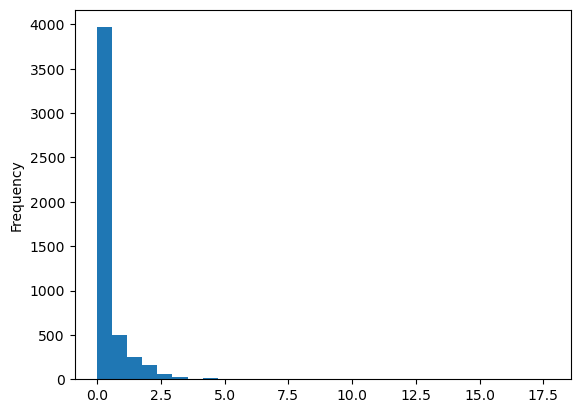

In [22]:
# Check distribution of first time point
ltm_wide_confounders_first_rows["time_hours"] = (
    ltm_wide_confounders_first_rows["time"].dt.total_seconds() / 3600
)
ltm_wide_confounders_first_rows["time_hours"].plot.hist(bins=30)



## Conclusion. Most data are recorded within 0 to 2 hours of admission. So, the first data point belongs to the bucket [0h, 12h]. i.e. data at 12th hour point.

In [23]:
df = ltm_wide_confounders.copy()

# Ensure correct dtype
df["time"] = pd.to_timedelta(df["time"])
df["los"]  = pd.to_timedelta(df["los"])

# --------------------------------------------------------------------
# Function to grid one stay_id
# --------------------------------------------------------------------
def process_stay(stay_df):
    stay_df = stay_df.sort_values("time")
    los = stay_df["los"].iloc[0]

    # LOS in hours
    total_hours = los.total_seconds() / 3600

    # Grid end points: 12h, 24h, 36h, ... up to ≥ los
    grid_ends_hours = np.arange(12, total_hours + 12, 12)
    grid_ends = pd.to_timedelta(grid_ends_hours, unit="h")

    rows = []

    for end in grid_ends:
        start = end - pd.Timedelta(hours=12)

        # Window: (start, end] except first window includes 0
        if start <= pd.Timedelta(0):
            window = stay_df[(stay_df["time"] >= pd.Timedelta(0)) &
                             (stay_df["time"] <= end)]
        else:
            window = stay_df[(stay_df["time"] > start) &
                             (stay_df["time"] <= end)]

        row = {
            "stay_id": stay_df["stay_id"].iloc[0],
            "grid_end": end,
        }

        # Mean variables
        for v in mean_vars:
            row[v] = window[v].mean() if len(window) else np.nan

        # Last variables
        for v in last_vars:
            row[v] = window[v].iloc[-1] if len(window) else np.nan

        # Baseline variables
        for b in baseline:
            row[b] = stay_df[b].iloc[0]

        rows.append(row)

    return pd.DataFrame(rows)


# --------------------------------------------------------------------
# Apply to all stay_ids
# --------------------------------------------------------------------
ltm_grided = (
    df.groupby("stay_id", group_keys=False)
      .apply(process_stay)
      .reset_index(drop=True)
)


C:\Users\snsimha\AppData\Local\Temp\ipykernel_19340\27187115.py:61: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(process_stay)


In [24]:
ltm_grided.stay_id.isna().sum()

0

In [25]:
ltm_grided

,stay_id,grid_end,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,paO2,...,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 12:00:00,36.622223,79.230766,71.000000,225.000000,43.166668,13.384615,98.461540,306.166656,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,1 days 00:00:00,36.944447,70.500000,79.571426,87.500000,NaN,18.250000,98.666664,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,1 days 12:00:00,37.333332,76.500000,87.750000,38.750000,NaN,21.000000,97.500000,NaN,...,1.0,0.557104,0.066140,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
3,mimic4-30003202,0 days 12:00:00,37.208336,99.312500,52.571430,46.500000,NaN,18.466667,96.533333,NaN,...,1.0,-0.526810,-0.743924,Surgical,Emergency,0 days 16:56:08.999999,2188-07-03 20:38:01,2188-07-04 13:34:10,183 days 03:21:59,0
4,mimic4-30003202,1 days 00:00:00,37.166668,91.400002,56.400002,95.000000,NaN,16.400000,93.599998,NaN,...,1.0,-0.526810,-0.743924,Surgical,Emergency,0 days 16:56:08.999999,2188-07-03 20:38:01,2188-07-04 13:34:10,183 days 03:21:59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38822,mimic4-39997955,3 days 00:00:00,36.907406,69.083336,95.916664,230.000000,NaN,21.166666,97.166664,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38823,mimic4-39997955,3 days 12:00:00,36.777779,70.500000,89.833336,245.714279,NaN,18.166666,96.416664,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38824,mimic4-39997955,4 days 00:00:00,36.861115,80.000000,98.416664,209.375000,NaN,19.000000,96.833336,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38825,mimic4-39997955,4 days 12:00:00,36.629635,84.833336,94.333336,162.727280,NaN,17.333334,95.500000,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0


In [26]:
ltm_grided.loc[ltm_grided.stay_id=="mimic4-30002548"]

,stay_id,grid_end,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,paO2,...,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 12:00:00,36.622223,79.230766,71.000000,225.00,43.166668,13.384615,98.461540,306.166656,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,1 days 00:00:00,36.944447,70.500000,79.571426,87.50,NaN,18.250000,98.666664,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,1 days 12:00:00,37.333332,76.500000,87.750000,38.75,NaN,21.000000,97.500000,NaN,...,1.0,0.557104,0.06614,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0


In [27]:
ltm_grided.stay_id.nunique()

5000

In [28]:
ltm_grided.loc[ltm_grided.stay_id=="mimic4-39997955"]

,stay_id,grid_end,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,paO2,...,sex,height,weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
38817,mimic4-39997955,0 days 12:00:00,36.425930,92.461540,93.000000,113.750000,NaN,16.846153,97.230766,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38818,mimic4-39997955,1 days 00:00:00,36.944447,87.833336,95.250000,220.625000,NaN,17.833334,98.083336,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38819,mimic4-39997955,1 days 12:00:00,36.796299,76.500000,92.000000,250.555557,NaN,22.416666,96.750000,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38820,mimic4-39997955,2 days 00:00:00,37.037037,70.500000,88.333336,265.000000,NaN,26.583334,97.000000,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38821,mimic4-39997955,2 days 12:00:00,36.685188,65.750000,94.500000,168.750000,NaN,22.250000,97.500000,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38822,mimic4-39997955,3 days 00:00:00,36.907406,69.083336,95.916664,230.000000,NaN,21.166666,97.166664,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38823,mimic4-39997955,3 days 12:00:00,36.777779,70.500000,89.833336,245.714279,NaN,18.166666,96.416664,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38824,mimic4-39997955,4 days 00:00:00,36.861115,80.000000,98.416664,209.375000,NaN,19.000000,96.833336,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38825,mimic4-39997955,4 days 12:00:00,36.629635,84.833336,94.333336,162.727280,NaN,17.333334,95.500000,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38826,mimic4-39997955,5 days 00:00:00,36.861115,103.166664,103.800003,217.500000,NaN,20.000000,97.333336,NaN,...,1.0,NaN,0.240528,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0


In [29]:
# Load mappings.json
with open("mappings.json", "r") as f:
    mappings = json.load(f)

# Apply renaming
ltm_grided = ltm_grided.rename(columns=mappings)

In [30]:
ltm_grided.columns

Index(['stay_id', 'grid_end', 'temperature__mean__last_12h',
       'heart_rate__mean__last_12h',
       'arterial_blood_pressure_mean__mean__last_12h',
       'fluid_out_urine__mean__last_12h', 'pco2_arterial__mean__last_12h',
       'respiratory_rate_measured__mean__last_12h',
       'o2_saturation__mean__last_12h', 'po2_arterial__mean__last_12h',
       'bicarbonate_arterial__last__last_12h',
       'activated_partial_thromboplastin_time__last__last_12h',
       'hemoglobin__last__last_12h', 'creatinine__last__last_12h',
       'ureum__last__last_12h', 'lactate__last__last_12h',
       'glasgow_coma_scale_total__last__last_12h', 'o2_flow__last__last_12h',
       'vent_mode__last__last_12h', 'age', 'sex', 'height', 'weight',
       'unit_type', 'origin', 'los', 'intime', 'outtime',
       'death_time_from_intime', 'icu_mortality'],
      dtype='object')

In [31]:
ltm_grided.stay_id.nunique()

5000

## Mortality within 7 days after discharge


In [32]:
# Ensure correct dtypes
ltm_grided["intime"]  = pd.to_datetime(ltm_grided["intime"], errors="coerce")
ltm_grided["outtime"] = pd.to_datetime(ltm_grided["outtime"], errors="coerce")

# death_time_from_intime must be timedelta
ltm_grided["death_time_from_intime"] = pd.to_timedelta(
    ltm_grided["death_time_from_intime"], errors="coerce"
)

# Absolute death time = intime + death offset
ltm_grided["death_abs_time"] = ltm_grided["intime"] + ltm_grided["death_time_from_intime"]

# 7-day post-ICU mortality (row level)
ltm_grided["mortality_within_7days_after_discharge"] = (
    ltm_grided["death_abs_time"].notna()
    & (ltm_grided["death_abs_time"] > ltm_grided["outtime"])
    & (ltm_grided["death_abs_time"] <= ltm_grided["outtime"] + pd.Timedelta(days=7))
).astype(int)

In [33]:
#ratio of mortality
last_rows = ltm_grided.groupby("stay_id").tail(1)
(last_rows["mortality_within_7days_after_discharge"] == 1).mean()

0.0356

## Check if "Mortality" is in-icu mortality

In [34]:
#ratio of icu mortality
(last_rows["icu_mortality"] == 1).mean()

0.1254

## vent_mode map back to categorical

In [35]:
ltm_grided.vent_mode__last__last_12h.value_counts(dropna=False)

vent_mode__last__last_12h
NaN     37741
14.0      486
10.0      379
29.0       43
41.0       41
9.0        31
31.0       27
22.0       21
27.0       16
17.0        7
28.0        6
38.0        5
11.0        4
21.0        4
2.0         3
13.0        2
12.0        2
7.0         2
8.0         1
15.0        1
36.0        1
5.0         1
26.0        1
16.0        1
6.0         1
Name: count, dtype: int64

In [36]:
# Load vent_mode_map.json
with open("vent_mode_map.json", "r") as g:
    ventmode_map = json.load(g)
reverse_ventmode_map = {v: k for k, v in ventmode_map.items()}

In [37]:
ltm_grided["vent_mode__last__last_12h"] = ltm_grided["vent_mode__last__last_12h"].map(reverse_ventmode_map)

In [38]:
ltm_grided["vent_mode__last__last_12h"] = ltm_grided["vent_mode__last__last_12h"].fillna("Unknown")

In [39]:
ltm_grided["vent_mode__last__last_12h"].value_counts(dropna=False)

vent_mode__last__last_12h
Unknown                37741
CPAP/PSV                 486
CMV/ASSIST/AutoFlow      379
PRVC/AC                   43
Standby                   41
CMV/ASSIST                31
PSV/SBT                   27
MMV/PSV/AutoFlow          21
PCV+Assist                16
CPAP/PSV+ApnVol            7
PRES/AC                    6
SPONT                      5
CMV/AutoFlow               4
MMV/PSV                    4
APRV                       3
CPAP/PPS                   2
CPAP                       2
Apnea Ventilation          2
CMV                        1
CPAP/PSV+Apn TCPL          1
SIMV/PSV/AutoFlow          1
APV (cmv)                  1
PCV+/PSV                   1
CPAP/PSV+ApnPres           1
Ambient                    1
Name: count, dtype: int64

## compute vent_mode_hours_since_last_change and then map to standard categories (invasive_controlled, invasive assisted etc)

In [40]:
ltm_grided["vent_mode__last__last_12h"]

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
38822    Unknown
38823    Unknown
38824    Unknown
38825    Unknown
38826    Unknown
Name: vent_mode__last__last_12h, Length: 38827, dtype: object

In [41]:
def compute_hours_since_change(df):
    df = df.sort_values("grid_end").copy()

    hours_since = []
    prev_mode = None
    counter = 0

    for mode in df["vent_mode__last__last_12h"]:
        if prev_mode is None:
            # First row in stay → cannot know prior history
            counter = 0
        else:
            if mode == prev_mode:
                counter += 12
            else:
                counter = 0

        hours_since.append(counter)
        prev_mode = mode

    df["vent_mode__hours_since_last__last_12h"] = hours_since
    return df

# Apply per stay_id
ltm_grided = (
    ltm_grided
    .groupby("stay_id", group_keys=False)
    .apply(compute_hours_since_change)
)


C:\Users\snsimha\AppData\Local\Temp\ipykernel_19340\1803582379.py:28: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_hours_since_change)


In [42]:
ltm_grided["vent_mode__hours_since_last__last_12h"].describe()

count    38827.000000
mean       101.199063
std        172.860649
min          0.000000
25%         12.000000
50%         48.000000
75%        108.000000
max       2184.000000
Name: vent_mode__hours_since_last__last_12h, dtype: float64

In [43]:
# Mapping vent_mode__last__last_12h from raw categories → derived categories
vent_mode_map = {
    "SPONT": "invasive_assisted",
    "CMV/ASSIST/AutoFlow": "invasive_controlled",
    "PSV/SBT": "invasive_assisted",
    "CMV/ASSIST": "invasive_controlled",
    "invasive_assisted": "invasive_assisted",
    "APV (cmv)": "invasive_controlled",
    "invasive_controlled": "invasive_controlled",
    "CPAP/PSV+ApnVol": "invasive_assisted",
    "SIMV/PSV/AutoFlow": "invasive_controlled",
    "CMV/AutoFlow": "invasive_controlled",
    "Spontaneous (S)": "invasive_assisted",
    "PCV+Assist": "invasive_controlled",
    "(S) CMV": "invasive_controlled",
    "Not applicable": "cancelled",
    "MMV/PSV/AutoFlow": "invasive_assisted",
    "PCV+": "invasive_controlled",
    "MMV/PSV": "invasive_assisted",
    "niv_unknown": "niv_unknown",
    "CPAP/PSV+ApnPres": "invasive_assisted",
    "PRES/AC": "invasive_controlled",
    "APRV/Biphasic+ApnVol": "invasive_controlled",
    "SIMV/PSV": "invasive_controlled",
    "CMV": "invasive_controlled",
    "Spontaneous/Timed (S/T) (Back up)": "cancelled",
    "VOL/AC": "invasive_controlled",
    "PCV+/PSV": "invasive_controlled",
    "SIMV/PRES": "invasive_controlled",
    "Apnea Ventilation": "cancelled",
    "niv_assisted": "niv_assisted",
    "APV (simv)": "invasive_controlled",
    "SYNCHRON MASTER": "cancelled",
    "SIMV/VOL": "invasive_controlled",
    "PRVC/SIMV": "invasive_controlled",
    "APRV/Biphasic+ApnPress": "invasive_controlled",
    "MMV/AutoFlow": "invasive_assisted",
    "P-SIMV": "invasive_controlled",
    "Timed (T)": "cancelled",
    "CPAP/PSV+Apn TCPL": "invasive_assisted",
    "SYNCHRON SLAVE": "cancelled",
    "DuoPaP": "invasive_assisted",
    "nCPAP-PS": "niv_assisted"
}
ltm_grided["vent_mode__last__last_12h"] = ltm_grided["vent_mode__last__last_12h"].map(vent_mode_map)

In [44]:
ltm_grided["vent_mode__last__last_12h"] = ltm_grided["vent_mode__last__last_12h"].fillna("Unknown")

## Check mim, max and distributions (density plot)

In [45]:
L_confounders = list(mappings.values()) + ["vent_mode__hours_since_last__last_12h"]

In [46]:
L_confounders

['bicarbonate_arterial__last__last_12h',
 'activated_partial_thromboplastin_time__last__last_12h',
 'temperature__mean__last_12h',
 'hemoglobin__last__last_12h',
 'heart_rate__mean__last_12h',
 'arterial_blood_pressure_mean__mean__last_12h',
 'creatinine__last__last_12h',
 'ureum__last__last_12h',
 'fluid_out_urine__mean__last_12h',
 'lactate__last__last_12h',
 'glasgow_coma_scale_total__last__last_12h',
 'pco2_arterial__mean__last_12h',
 'respiratory_rate_measured__mean__last_12h',
 'o2_saturation__mean__last_12h',
 'o2_flow__last__last_12h',
 'po2_arterial__mean__last_12h',
 'vent_mode__last__last_12h',
 'vent_mode__hours_since_last__last_12h']

In [49]:
L_to_clip = [
 'bicarbonate_arterial__last__last_12h',
 'activated_partial_thromboplastin_time__last__last_12h',
 'temperature__mean__last_12h',
 'hemoglobin__last__last_12h',
 'heart_rate__mean__last_12h',
 'arterial_blood_pressure_mean__mean__last_12h',
 'creatinine__last__last_12h',
 'ureum__last__last_12h',
 'fluid_out_urine__mean__last_12h',
 'lactate__last__last_12h',
 #'glasgow_coma_scale_total__last__last_12h',
 'pco2_arterial__mean__last_12h',
 'respiratory_rate_measured__mean__last_12h',
 'o2_saturation__mean__last_12h',
 'o2_flow__last__last_12h',
 'po2_arterial__mean__last_12h',
 #'vent_mode__last__last_12h',
 #'vent_mode__hours_since_last__last_12h'
 ]

In [59]:
ltm_grided.hemoglobin__last__last_12h.describe()

count       939.000000
mean       1074.568477
std       32633.420245
min           5.000000
25%           8.100000
50%           9.300000
75%          10.800000
max      999999.000000
Name: hemoglobin__last__last_12h, dtype: float64

In [60]:
def mask_sentinels(df, vars_to_clean, lower=0, upper=1e4):
    """
    Returns a copy of df where any value in vars_to_clean below 'lower'
    or above 'upper' is set to NaN.
    """
    df_clean = df.copy()

    df_clean[vars_to_clean] = df_clean[vars_to_clean].mask(
        (df_clean[vars_to_clean] < lower) | (df_clean[vars_to_clean] > upper),
        np.nan
    )

    return df_clean
ltm_grided_clean = mask_sentinels(ltm_grided, L_to_clip)


In [61]:
ltm_grided_clean.hemoglobin__last__last_12h.describe()

count    938.000000
mean       9.617058
std        2.003718
min        5.000000
25%        8.100000
50%        9.300000
75%       10.800000
max       18.400000
Name: hemoglobin__last__last_12h, dtype: float64

In [63]:
def clip_mean_iqr(df, vars_to_clip, k=4):
    """
    Two-sided robust clipping: mean ± k*IQR for each variable.
    k=4 by default.
    """
    df = df.copy()
    
    for col in vars_to_clip:
        # compute summary statistics
        mean = df[col].mean()
        q1   = df[col].quantile(0.25)
        q3   = df[col].quantile(0.75)
        iqr  = q3 - q1
        
        lower = mean - k * iqr
        upper = mean + k * iqr
        
        df[col] = df[col].clip(lower=lower, upper=upper)
    
    return df
ltm_grided_clipped = clip_mean_iqr(ltm_grided_clean, L_to_clip, 4)


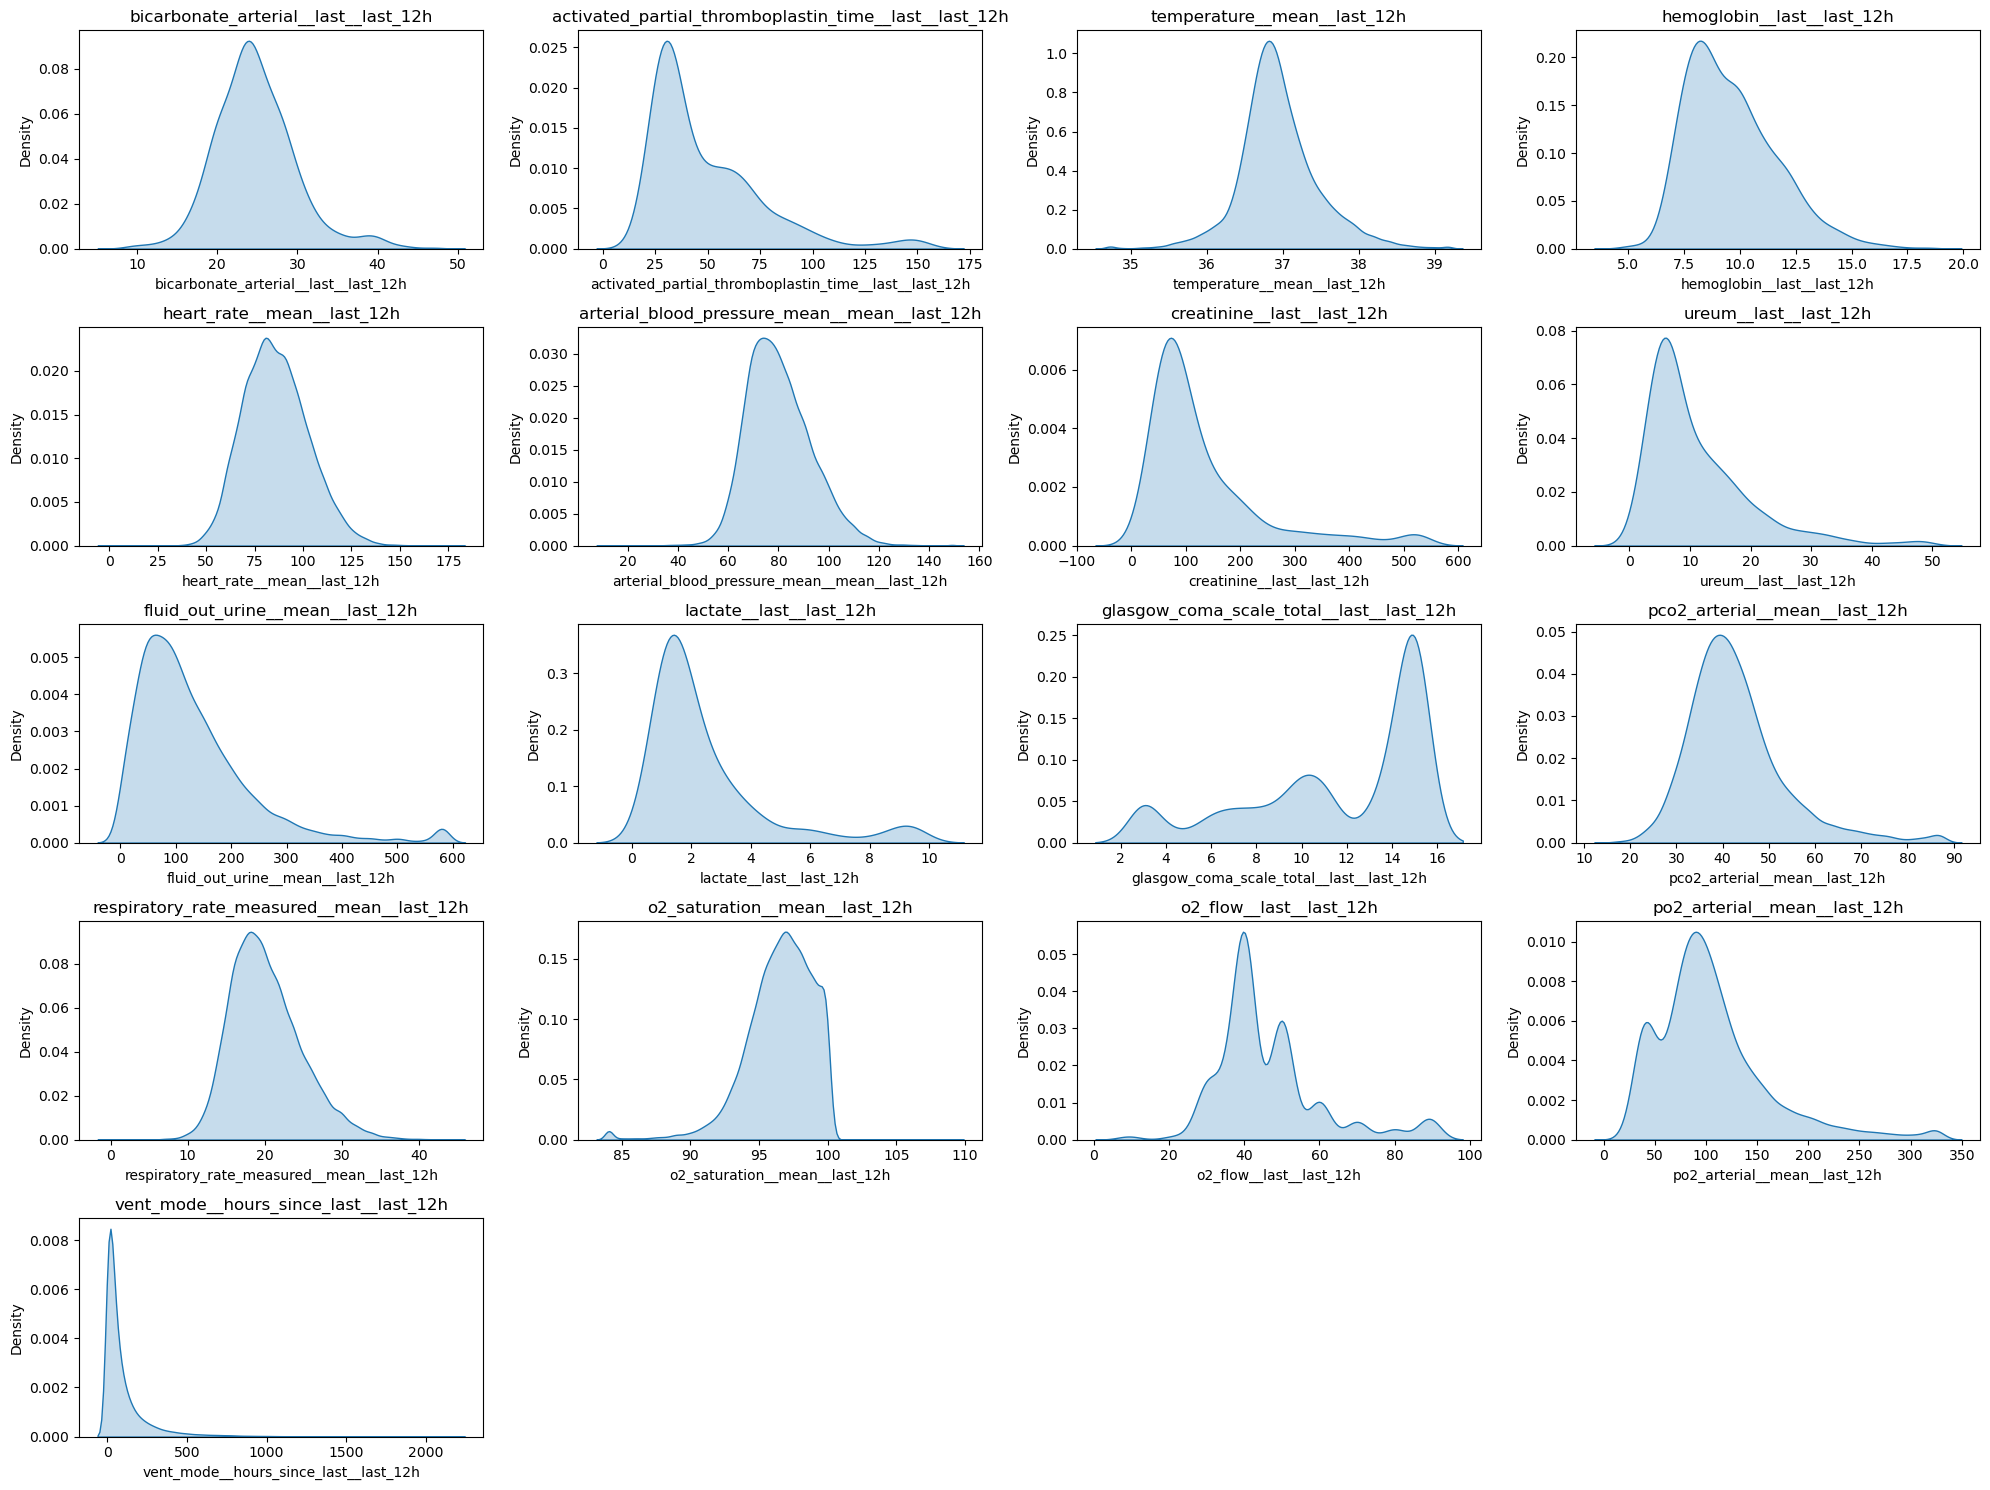

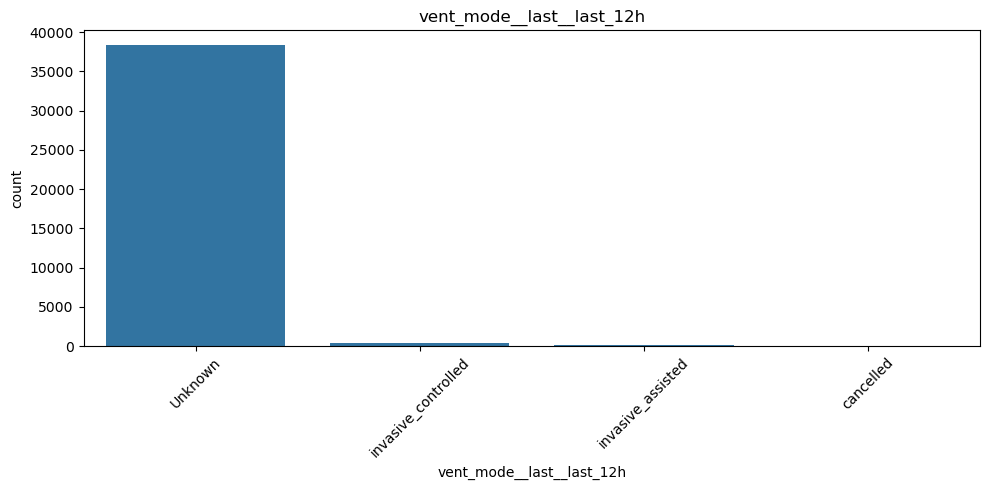

In [64]:
# Split categorical vs numerical
cat_var  = "vent_mode__last__last_12h"
num_vars = [v for v in L_confounders if v != cat_var]

# === NUMERIC VARIABLES: Density plots ===
n = len(num_vars)
cols = 4
rows = (n + cols - 1) // cols

plt.figure(figsize=(20, rows * 3))

for i, var in enumerate(num_vars, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=ltm_grided_clipped, x=var, fill=True, bw_adjust=1)
    plt.title(var)
    plt.tight_layout()

plt.show()

# === CATEGORICAL VARIABLE: Countplot ===
plt.figure(figsize=(10, 5))
sns.countplot(data=ltm_grided_clipped, x=cat_var)
plt.xticks(rotation=45)
plt.title(cat_var)
plt.tight_layout()
plt.show()


In [65]:
ltm_grided_clipped.to_parquet("../Dataset/mimic-iv/from_pipeline/ltm_grided_cleaned_5000.parquet")